<a href="https://colab.research.google.com/github/bpavann/Facial-Expression-Analysis/blob/main/Term_Project_Facial_Expression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluate the Model

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt


In [ ]:

# Load the dataset
data_path = "/content/fer2013.csv"
data = pd.read_csv(data_path)


In [ ]:

# Prepare the dataset
def preprocess_data(data):
    pixels = data['pixels'].tolist()
    images = np.array([np.fromstring(pixel, dtype=int, sep=' ').reshape(48, 48) for pixel in pixels])
    images = images / 255.0  # Normalize pixel values
    images = np.expand_dims(images, -1)  # Add channel dimension
    labels = to_categorical(data['emotion'], num_classes=7)
    return images, labels

images, labels = preprocess_data(data)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 expressions
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)


Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 93s 201ms/step - accuracy: 0.2792 - loss: 1.7719 - val_accuracy: 0.4064 - val_loss: 1.5354
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 91s 203ms/step - accuracy: 0.4022 - loss: 1.5519 - val_accuracy: 0.4355 - val_loss: 1.4624
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 90s 200ms/step - accuracy: 0.4373 - loss: 1.4533 - val_accuracy: 0.4778 - val_loss: 1.3820
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 143s 203ms/step - accuracy: 0.4603 - loss: 1.3997 - val_accuracy: 0.5004 - val_loss: 1.3522
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.4838 - loss: 1.3412 - val_accuracy: 0.4972 - val_loss: 1.3132


In [ ]:
# Save the model
model.save('emotion_cnn_model.h5')


In [ ]:

# Predicting a user-provided image
def predict_expression(image_path, model):
    # Load and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image, (48, 48)) / 255.0
    image_resized = np.expand_dims(image_resized, axis=0)  # Add batch dimension
    image_resized = np.expand_dims(image_resized, axis=-1)  # Add channel dimension

    # Predict the expression
    prediction = model.predict(image_resized)
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    return emotion_labels[np.argmax(prediction)]
# Load the saved model
loaded_model = tf.keras.models.load_model('emotion_cnn_model.h5')


Please upload an image:


Saving PrivateTest_1414350.jpg to PrivateTest_1414350.jpg
Uploaded file: PrivateTest_1414350.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted Expression: Neutral


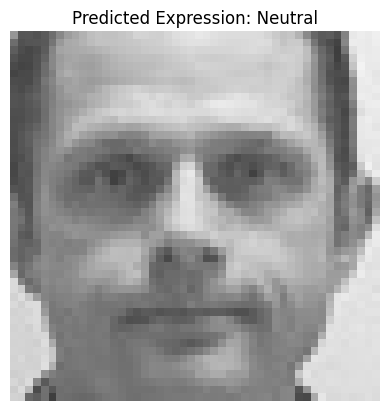

In [ ]:
from google.colab import files

# Input from user
def upload_and_predict(model):

    print("Please upload an image:")
    uploaded = files.upload()  # Colab file upload interface

    for image_name in uploaded.keys():
        print(f"Uploaded file: {image_name}")
        image_path = image_name

        # Predict the expression
        try:
            predicted_expression = predict_expression(image_path, model)
            print(f"Predicted Expression: {predicted_expression}")

            # Display the uploaded image
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image_rgb)
            plt.title(f"Predicted Expression: {predicted_expression}")
            plt.axis('off')
            plt.show()

        except Exception as e:
            print(f"Error: {e}")

# Load the saved model
loaded_model = tf.keras.models.load_model('emotion_cnn_model.h5')

# Call the upload and predict function
upload_and_predict(loaded_model)
